# Historical Data Analysis
The goal of the data is to see if we can find trends in historical data and also to compare generated (ETAS) with recorded (USGS) data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
csv_file = "Formatted_ETAS_Output.csv"
etas = pd.read_csv(csv_file, sep = ',', lineterminator='\n')
etas.head()

,Date,Time,Year,X,Y,Magnitude,Z\r
0,12/31/59,0:03:09.00,1960.002196,-119.0502,33.9790,6.50,8.2474
1,1/2/60,0:08:49.00,1960.006125,-115.6222,33.0793,4.25,7.9322
2,1/2/60,0:10:31.00,1960.007305,-115.6323,33.1220,3.03,8.4015
3,1/2/60,0:10:32.00,1960.007320,-115.5851,33.0745,3.03,7.9678
4,1/2/60,0:11:07.00,1960.007720,-115.6256,33.0290,3.08,7.9737


In [3]:
csv_file = "All (1960-2023).csv"
usgs = pd.read_csv(csv_file, sep = ',', lineterminator='\n', dtype={'time':str})
usgs.head()

C:\Users\deyan\AppData\Local\Temp\ipykernel_13812\3779433482.py:2: DtypeWarning: Columns (1,2,3,4,6,7,8,9,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  usgs = pd.read_csv(csv_file, sep = ',', lineterminator='\n', dtype={'time':str})


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource\r
0,2023-10-12T21:41:21.480Z,36.4661674,-120.8755035,15.85,3.15,ml,60,135,0.1035,0.2,...,2023-10-13T19:19:02.194Z,"19 km WNW of New Idria, CA",earthquake,0.4,0.61,0.175,21,automatic,nc,nc\r
1,2023-10-08T21:30:23.900Z,38.8271667,-122.804,1.75,3.87,mw,108,20,0.006058,0.06,...,2023-10-14T02:06:32.597Z,"7 km NW of The Geysers, CA",earthquake,0.07,0.11,NaN,3,reviewed,nc,nc\r
2,2023-10-05T03:09:58.000Z,35.041,-117.661,0.79,3.52,ml,63,40,0.1102,0.15,...,2023-10-06T21:24:55.024Z,"5 km NNW of Boron, CA",earthquake,0.12,0.32,0.15,156,reviewed,ci,ci\r
3,2023-10-01T19:29:36.760Z,40.2915,-124.2905,9.59,3.61,mw,40,115,0.0308,0.17,...,2023-10-10T16:43:18.991Z,"4 km S of Petrolia, CA",earthquake,0.36,0.21,NaN,4,reviewed,nc,nc\r
4,2023-10-01T15:41:29.620Z,40.2951667,-124.287,9.8,4.09,mw,42,105,0.02685,0.17,...,2023-10-02T02:34:55.127Z,"3 km S of Petrolia, CA",earthquake,0.37,0.23,NaN,4,reviewed,nc,nc\r


In [4]:
#converting the Date column into datetime format
etas["Date"] = pd.to_datetime(etas["Date"], errors="coerce", format="%m/%d/%y")
etas.loc[etas["Date"].dt.year > pd.Timestamp.now().year, "Date"] -= pd.DateOffset(years=100)

etas.head()

,Date,Time,Year,X,Y,Magnitude,Z\r
0,1959-12-31,0:03:09.00,1960.002196,-119.0502,33.9790,6.50,8.2474
1,1960-01-02,0:08:49.00,1960.006125,-115.6222,33.0793,4.25,7.9322
2,1960-01-02,0:10:31.00,1960.007305,-115.6323,33.1220,3.03,8.4015
3,1960-01-02,0:10:32.00,1960.007320,-115.5851,33.0745,3.03,7.9678
4,1960-01-02,0:11:07.00,1960.007720,-115.6256,33.0290,3.08,7.9737


In [5]:
#converting the Date column into datetime format
usgs["time"] = pd.to_datetime(usgs["time"], errors="coerce").dt.strftime("%Y-%m-%d")
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource\r
0,2023-10-12,36.4661674,-120.8755035,15.85,3.15,ml,60,135,0.1035,0.2,...,2023-10-13T19:19:02.194Z,"19 km WNW of New Idria, CA",earthquake,0.4,0.61,0.175,21,automatic,nc,nc\r
1,2023-10-08,38.8271667,-122.804,1.75,3.87,mw,108,20,0.006058,0.06,...,2023-10-14T02:06:32.597Z,"7 km NW of The Geysers, CA",earthquake,0.07,0.11,NaN,3,reviewed,nc,nc\r
2,2023-10-05,35.041,-117.661,0.79,3.52,ml,63,40,0.1102,0.15,...,2023-10-06T21:24:55.024Z,"5 km NNW of Boron, CA",earthquake,0.12,0.32,0.15,156,reviewed,ci,ci\r
3,2023-10-01,40.2915,-124.2905,9.59,3.61,mw,40,115,0.0308,0.17,...,2023-10-10T16:43:18.991Z,"4 km S of Petrolia, CA",earthquake,0.36,0.21,NaN,4,reviewed,nc,nc\r
4,2023-10-01,40.2951667,-124.287,9.8,4.09,mw,42,105,0.02685,0.17,...,2023-10-02T02:34:55.127Z,"3 km S of Petrolia, CA",earthquake,0.37,0.23,NaN,4,reviewed,nc,nc\r


In [6]:
#filter the dataset by Date > 1960-01-01 and Date < 2023-01-1 
etas = etas[(etas['Date'] > pd.to_datetime('1960-01-01')) & (etas['Date'] < pd.to_datetime('2023-01-01'))]

#filter the dataset by X > -123 and X < -113 and Y > 29 and Y < 39
etas = etas[etas['X'] > -123]
etas = etas[etas['X'] < -113]
etas = etas[etas['Y'] < 39]
etas = etas[etas['Y'] > 29]

etas.head()

,Date,Time,Year,X,Y,Magnitude,Z\r
1,1960-01-02,0:08:49.00,1960.006125,-115.6222,33.0793,4.25,7.9322
2,1960-01-02,0:10:31.00,1960.007305,-115.6323,33.1220,3.03,8.4015
3,1960-01-02,0:10:32.00,1960.007320,-115.5851,33.0745,3.03,7.9678
4,1960-01-02,0:11:07.00,1960.007720,-115.6256,33.0290,3.08,7.9737
5,1960-01-02,0:11:17.00,1960.007840,-115.6050,33.0276,3.61,7.9322


In [7]:
#filter the dataset by Date > 1960-01-01 and Date < 2023-01-1 
usgs = usgs[(pd.to_datetime(usgs['time']) > pd.to_datetime('1960-01-01')) & (pd.to_datetime(usgs['time']) < pd.to_datetime('2023-01-01'))]

usgs['longitude'] = pd.to_numeric(usgs['longitude'], errors='coerce')
usgs['latitude'] = pd.to_numeric(usgs['latitude'], errors='coerce')

#filter the dataset by X > -123 and X < -113 and Y > 29 and Y < 39
usgs = usgs[usgs['longitude'] > -123]
usgs = usgs[usgs['longitude'] < -113]
usgs = usgs[usgs['latitude'] < 39]
usgs = usgs[usgs['latitude'] > 29]
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource\r
240,2022-12-31,33.397500,-116.393333,3.88,4.14,mw,132,16,0.07391,0.19,...,2023-09-22T21:50:30.029Z,"16 km N of Borrego Springs, CA",earthquake,0.1,0.38,NaN,6,reviewed,ci,ci\r
241,2022-12-31,34.355667,-116.921833,4.73,3.47,mw,121,25,0.07845,0.15,...,2023-03-07T19:00:01.040Z,"11km SSE of Lucerne Valley, CA",earthquake,0.09,0.41,NaN,4,reviewed,ci,ci\r
246,2022-12-22,37.620167,-122.025000,3.82,3.34,mw,141,16,NaN,0.16,...,2023-04-20T04:34:00.806Z,"3km N of Union City, CA",earthquake,0.1,0.17,NaN,3,reviewed,nc,nc\r
262,2022-12-17,37.918167,-122.304000,5.48,3.57,mw,170,19,0.01598,0.15,...,2023-07-27T08:15:34.318Z,"1km ENE of El Cerrito, CA",earthquake,0.1,0.17,NaN,4,reviewed,nc,nc\r
263,2022-12-13,36.604667,-121.209333,8.88,3.28,ml,67,55,0.03812,0.09,...,2023-02-18T22:04:08.040Z,"10km NW of Pinnacles, CA",earthquake,0.14,0.28,0.129,72,reviewed,nc,nc\r


In [8]:
summary_stats = etas.describe(include="all")
print(summary_stats)

                       Date        Time          Year             X  \
count                 31547       31547  31547.000000  31547.000000   
unique                18880       26489           NaN           NaN   
top     1964-04-26 00:00:00  6:49:17.00           NaN           NaN   
freq                     10           5           NaN           NaN   
first   1960-01-02 00:00:00         NaN           NaN           NaN   
last    2022-12-31 00:00:00         NaN           NaN           NaN   
mean                    NaN         NaN   1991.704948   -117.520496   
std                     NaN         NaN     18.290538      2.080386   
min                     NaN         NaN   1960.006125   -122.971200   
25%                     NaN         NaN   1975.794142   -118.711750   
50%                     NaN         NaN   1992.042660   -117.191400   
75%                     NaN         NaN   2007.554579   -116.092200   
max                     NaN         NaN   2023.001815   -113.246300   

     

C:\Users\deyan\AppData\Local\Temp\ipykernel_13812\2667887429.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = etas.describe(include="all")


In [9]:
summary_stats = usgs.describe(include="all")
print(summary_stats)

              time      latitude     longitude  depth    mag magType    nst  \
count        28052  28052.000000  28052.000000  28042  28052   28051  26558   
unique       11447           NaN           NaN  10875    357      12    260   
top     2019-07-06           NaN           NaN      6      3      ml      0   
freq           605           NaN           NaN   2151   1492   18987   5754   
mean           NaN     35.619491   -118.254409    NaN    NaN     NaN    NaN   
std            NaN      1.926341      2.120540    NaN    NaN     NaN    NaN   
min            NaN     32.176000   -122.992000    NaN    NaN     NaN    NaN   
25%            NaN     34.032000   -119.650750    NaN    NaN     NaN    NaN   
50%            NaN     35.873500   -118.058633    NaN    NaN     NaN    NaN   
75%            NaN     37.399000   -116.390167    NaN    NaN     NaN    NaN   
max            NaN     38.996000   -113.560667    NaN    NaN     NaN    NaN   

          gap     dmin    rms  ...                 

In [10]:
# Mean magnitude for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].mean())

# Sum of magnitudes for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].sum())


Date
1960    3.421501
1961    3.431192
1962    3.455392
1963    3.464771
1964    3.479369
          ...   
2018    3.410692
2019    3.476648
2020    3.452177
2021    3.435720
2022    3.451487
Name: Magnitude, Length: 63, dtype: float64
Date
1960    1549.94
1961    1554.33
1962    1717.33
1963    1663.09
1964    2094.58
         ...   
2018    1626.90
2019    1866.96
2020    1712.28
2021    1669.76
2022    1763.71
Name: Magnitude, Length: 63, dtype: float64


In [11]:
time = []
for i in usgs['time']:
    time.append(pd.to_datetime(i))
usgs['time'] = time

In [12]:
usgs['mag'] = pd.to_numeric(usgs['mag'], errors='coerce')

#group usgs times by year and print mean magnitude
print(usgs.groupby(usgs['time'].dt.year)['mag'].mean())

#group usgs times by year and print sum of magnitude
print(usgs.groupby(usgs['time'].dt.year)['mag'].sum())

time
1960    3.500103
1961    3.550617
1962    3.605721
1963    3.632488
1964    3.614620
          ...   
2018    3.429632
2019    3.454067
2020    3.439794
2021    3.429510
2022    3.416330
Name: mag, Length: 63, dtype: float64
time
1960     339.5100
1961     575.2000
1962     749.9900
1963     744.6600
1964     618.1000
          ...    
2018     559.0300
2019    4611.1800
2020    2999.5000
2021    1323.7907
2022     744.7600
Name: mag, Length: 63, dtype: float64


In [13]:
# Maximum magnitude for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].max())

# Total number of earthquakes for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].count())

Date
1960    5.22
1961    5.78
1962    6.38
1963    5.71
1964    7.65
        ... 
2018    6.36
2019    5.57
2020    6.28
2021    6.80
2022    6.46
Name: Magnitude, Length: 63, dtype: float64
Date
1960    453
1961    453
1962    497
1963    480
1964    602
       ... 
2018    477
2019    537
2020    496
2021    486
2022    511
Name: Magnitude, Length: 63, dtype: int64


In [14]:
# Maximum usgs magnitude for each year
print(usgs.groupby(usgs['time'].dt.year)['mag'].max())

# Total number of earthquakes for each year
print(usgs.groupby(usgs['time'].dt.year)['mag'].count())

time
1960    5.00
1961    5.88
1962    5.10
1963    5.40
1964    5.20
        ... 
2018    5.29
2019    7.10
2020    6.50
2021    6.00
2022    5.06
Name: mag, Length: 63, dtype: float64
time
1960      97
1961     162
1962     208
1963     205
1964     171
        ... 
2018     163
2019    1335
2020     872
2021     386
2022     218
Name: mag, Length: 63, dtype: int64


Grouping the data into 1 month chunks and then get the same feature values


In [15]:
# Mean magnitude for each month
mean_mag_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.mean())
print(mean_mag_etas)

# Sum of magnitudes for each month
sum_mag_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.sum())
print(sum_mag_etas)

         Magnitude
Date              
1960-01   3.325385
1960-02   3.417838
1960-03   3.496923
1960-04   3.385135
1960-05   3.438857
...            ...
2022-08   3.386829
2022-09   3.368857
2022-10   3.482381
2022-11   3.512558
2022-12   3.417179

[755 rows x 1 columns]
         Magnitude
Date              
1960-01     172.92
1960-02     126.46
1960-03     181.84
1960-04     125.25
1960-05     120.36
...            ...
2022-08     138.86
2022-09     117.91
2022-10     146.26
2022-11     151.04
2022-12     133.27

[755 rows x 1 columns]


In [16]:
# Mean magnitude for each month
mean_mag_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.mean())
print(mean_mag_usgs)

# Sum of magnitudes for each month
sum_mag_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.sum())
print(sum_mag_usgs)

              mag
time             
1960-01  3.668333
1960-02  3.353750
1960-03  3.346667
1960-04  3.621111
1960-05  3.423333
...           ...
2022-08  3.476154
2022-09  3.452727
2022-10  3.352778
2022-11  3.172857
2022-12  3.555000

[756 rows x 1 columns]
           mag
time          
1960-01  44.02
1960-02  26.83
1960-03  20.08
1960-04  32.59
1960-05  20.54
...        ...
2022-08  45.19
2022-09  75.96
2022-10  60.35
2022-11  22.21
2022-12  42.66

[756 rows x 1 columns]


In [17]:
# Maximum magnitude for each month
max_mag_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.max())
print(max_mag_etas)

# Total number of earthquakes for each month
earthquake_count_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.count())
print(earthquake_count_etas)

         Magnitude
Date              
1960-01       4.25
1960-02       4.68
1960-03       5.22
1960-04       4.49
1960-05       4.29
...            ...
2022-08       4.02
2022-09       4.30
2022-10       5.88
2022-11       5.19
2022-12       5.09

[755 rows x 1 columns]
         Magnitude
Date              
1960-01         52
1960-02         37
1960-03         52
1960-04         37
1960-05         35
...            ...
2022-08         41
2022-09         35
2022-10         42
2022-11         43
2022-12         39

[755 rows x 1 columns]


In [18]:
# Maximum magnitude for each month
max_mag_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.max())
print(max_mag_usgs)

# Total number of earthquakes for each month
earthquake_count_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.count())

          mag
time         
1960-01  5.00
1960-02  3.79
1960-03  3.67
1960-04  4.24
1960-05  4.00
...       ...
2022-08  4.45
2022-09  4.39
2022-10  5.06
2022-11  3.50
2022-12  4.14

[756 rows x 1 columns]


In [19]:
mean_mag_etas = mean_mag_etas.reset_index()
mean_mag_etas["ETAS"] = mean_mag_etas["Magnitude"]
mean_mag_etas = mean_mag_etas.drop(columns = ["Magnitude"])
mean_mag_etas.head()

,Date,ETAS
0,1960-01,3.325385
1,1960-02,3.417838
2,1960-03,3.496923
3,1960-04,3.385135
4,1960-05,3.438857


In [20]:
mean_mag_usgs = mean_mag_usgs.reset_index()
mean_mag_usgs['Date'] = mean_mag_usgs['time']
mean_mag_usgs["USGS"] = mean_mag_usgs["mag"]
mean_mag_usgs = mean_mag_usgs.drop(columns = ["mag"])
mean_mag_usgs = mean_mag_usgs.drop(columns = ["time"])
mean_mag_usgs.head()

,Date,USGS
0,1960-01,3.668333
1,1960-02,3.353750
2,1960-03,3.346667
3,1960-04,3.621111
4,1960-05,3.423333


In [21]:
merged_mean_mag = mean_mag_etas.merge(mean_mag_usgs, on='Date')
merged_mean_mag.head()

,Date,ETAS,USGS
0,1960-01,3.325385,3.668333
1,1960-02,3.417838,3.353750
2,1960-03,3.496923,3.346667
3,1960-04,3.385135,3.621111
4,1960-05,3.438857,3.423333


In [22]:
# Assuming merged_sum_mag is a DataFrame with 'Date', 'ETAS', and 'USGS' columns
merged_mean_mag['Date'] = merged_mean_mag['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_mean_mag, x='Date', 
              y=['ETAS', 'USGS'], labels={'value': 'Magnitude'}, 
              title='ETAS vs USGS Mean Earthquake Magnitudes')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [23]:
sum_mag_etas = sum_mag_etas.reset_index()
sum_mag_etas["ETAS"] = sum_mag_etas["Magnitude"]
sum_mag_etas = sum_mag_etas.drop(columns = ["Magnitude"])

sum_mag_usgs = sum_mag_usgs.reset_index()
sum_mag_usgs['Date'] = sum_mag_usgs['time']
sum_mag_usgs["USGS"] = sum_mag_usgs["mag"]
sum_mag_usgs = sum_mag_usgs.drop(columns = ["mag"])
sum_mag_usgs = sum_mag_usgs.drop(columns = ["time"])

merged_sum_mag = sum_mag_etas.merge(sum_mag_usgs, on='Date')
merged_sum_mag.head()


,Date,ETAS,USGS
0,1960-01,172.92,44.02
1,1960-02,126.46,26.83
2,1960-03,181.84,20.08
3,1960-04,125.25,32.59
4,1960-05,120.36,20.54


In [24]:
# Assuming merged_sum_mag is a DataFrame with 'Date', 'ETAS', and 'USGS' columns
merged_sum_mag['Date'] = merged_sum_mag["Date"].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_sum_mag, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Magnitude'}, title='ETAS vs USGS Sum Of Magnitudes')

fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [25]:
max_mag_etas = max_mag_etas.reset_index()
max_mag_etas["ETAS"] = max_mag_etas["Magnitude"]
max_mag_etas = max_mag_etas.drop(columns = ["Magnitude"])

max_mag_usgs = max_mag_usgs.reset_index()
max_mag_usgs['Date'] = max_mag_usgs['time']
max_mag_usgs["USGS"] = max_mag_usgs["mag"]
max_mag_usgs = max_mag_usgs.drop(columns = ["mag"])
max_mag_usgs = max_mag_usgs.drop(columns = ["time"])

merged_max_mag = max_mag_etas.merge(max_mag_usgs, on='Date')
merged_max_mag.head()

,Date,ETAS,USGS
0,1960-01,4.25,5.00
1,1960-02,4.68,3.79
2,1960-03,5.22,3.67
3,1960-04,4.49,4.24
4,1960-05,4.29,4.00


In [26]:
merged_max_mag['Date'] = merged_max_mag['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_max_mag, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Magnitude'}, title='ETAS vs USGS Max Magnitude')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [27]:
earthquake_count_etas = earthquake_count_etas.reset_index()
earthquake_count_etas["ETAS"] = earthquake_count_etas["Magnitude"]
earthquake_count_etas = earthquake_count_etas.drop(columns = ["Magnitude"])


In [28]:
earthquake_count_usgs = earthquake_count_usgs.reset_index()
earthquake_count_usgs['Date'] = earthquake_count_usgs['time']
earthquake_count_usgs["USGS"] = earthquake_count_usgs["mag"]
earthquake_count_usgs = earthquake_count_usgs.drop(columns = ["mag"])
earthquake_count_usgs = earthquake_count_usgs.drop(columns = ["time"])

In [29]:
merged_earthquake_counts = earthquake_count_etas.merge(earthquake_count_usgs, on='Date')
merged_earthquake_counts.head()

,Date,ETAS,USGS
0,1960-01,52,12
1,1960-02,37,8
2,1960-03,52,6
3,1960-04,37,9
4,1960-05,35,6


In [30]:
merged_earthquake_counts['Date'] = merged_earthquake_counts['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_earthquake_counts, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Number of Earthquakes'}, title='ETAS vs USGS Number of Earthquakes')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [31]:
# Plot difference between ETAS/USGS mean mag and print variance
usgs_mean_df = mean_mag_usgs.copy()
etas_mean_df = mean_mag_etas.copy()
merged_mean_df = usgs_mean_df.merge(etas_mean_df, on='Date', how='inner')
merged_mean_df['Result'] = merged_mean_df['USGS'] - merged_mean_df['ETAS']
print(merged_mean_df)

        Date      USGS      ETAS    Result
0    1960-01  3.668333  3.325385  0.342949
1    1960-02  3.353750  3.417838 -0.064088
2    1960-03  3.346667  3.496923 -0.150256
3    1960-04  3.621111  3.385135  0.235976
4    1960-05  3.423333  3.438857 -0.015524
..       ...       ...       ...       ...
750  2022-08  3.476154  3.386829  0.089325
751  2022-09  3.452727  3.368857  0.083870
752  2022-10  3.352778  3.482381 -0.129603
753  2022-11  3.172857  3.512558 -0.339701
754  2022-12  3.555000  3.417179  0.137821

[755 rows x 4 columns]


In [32]:
# Check for months where maximum >= 5
etas_mask = max_mag_etas['ETAS'] >= 5
etas_max = max_mag_etas[etas_mask]
etas_size = len(etas_max)

usgs_mask = max_mag_usgs['USGS'] >= 5
usgs_max = max_mag_usgs[usgs_mask]
usgs_size = len(usgs_max)

print(etas_size)
print(usgs_size)

312
234


In [33]:
usgs_max_df = usgs_max.copy()
etas_max_df = etas_max.copy()
merged_max_df = usgs_max_df.merge(etas_max_df, on='Date', how='inner')
merged_max_df['Result'] = merged_max_df['USGS'] - merged_max_df['ETAS']
print(merged_max_df)

       Date  USGS  ETAS  Result
0   1961-01  5.05  5.78   -0.73
1   1961-04  5.88  5.51    0.37
2   1961-10  5.13  5.71   -0.58
3   1962-04  5.10  5.02    0.08
4   1962-05  5.10  6.01   -0.91
..      ...   ...   ...     ...
81  2016-06  5.19  5.91   -0.72
82  2016-12  5.60  5.17    0.43
83  2020-04  5.24  5.15    0.09
84  2021-06  5.25  5.08    0.17
85  2022-10  5.06  5.88   -0.82

[86 rows x 4 columns]


In [34]:
origin = 0
x_values = merged_max_df['Date'].astype(str)
y_values = merged_max_df['Result']
colors = []

for y in y_values:
    if y < origin:
        colors.append('red')
    else:
        colors.append('blue')

C:\Users\deyan\AppData\Local\Temp\ipykernel_13812\2658499480.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



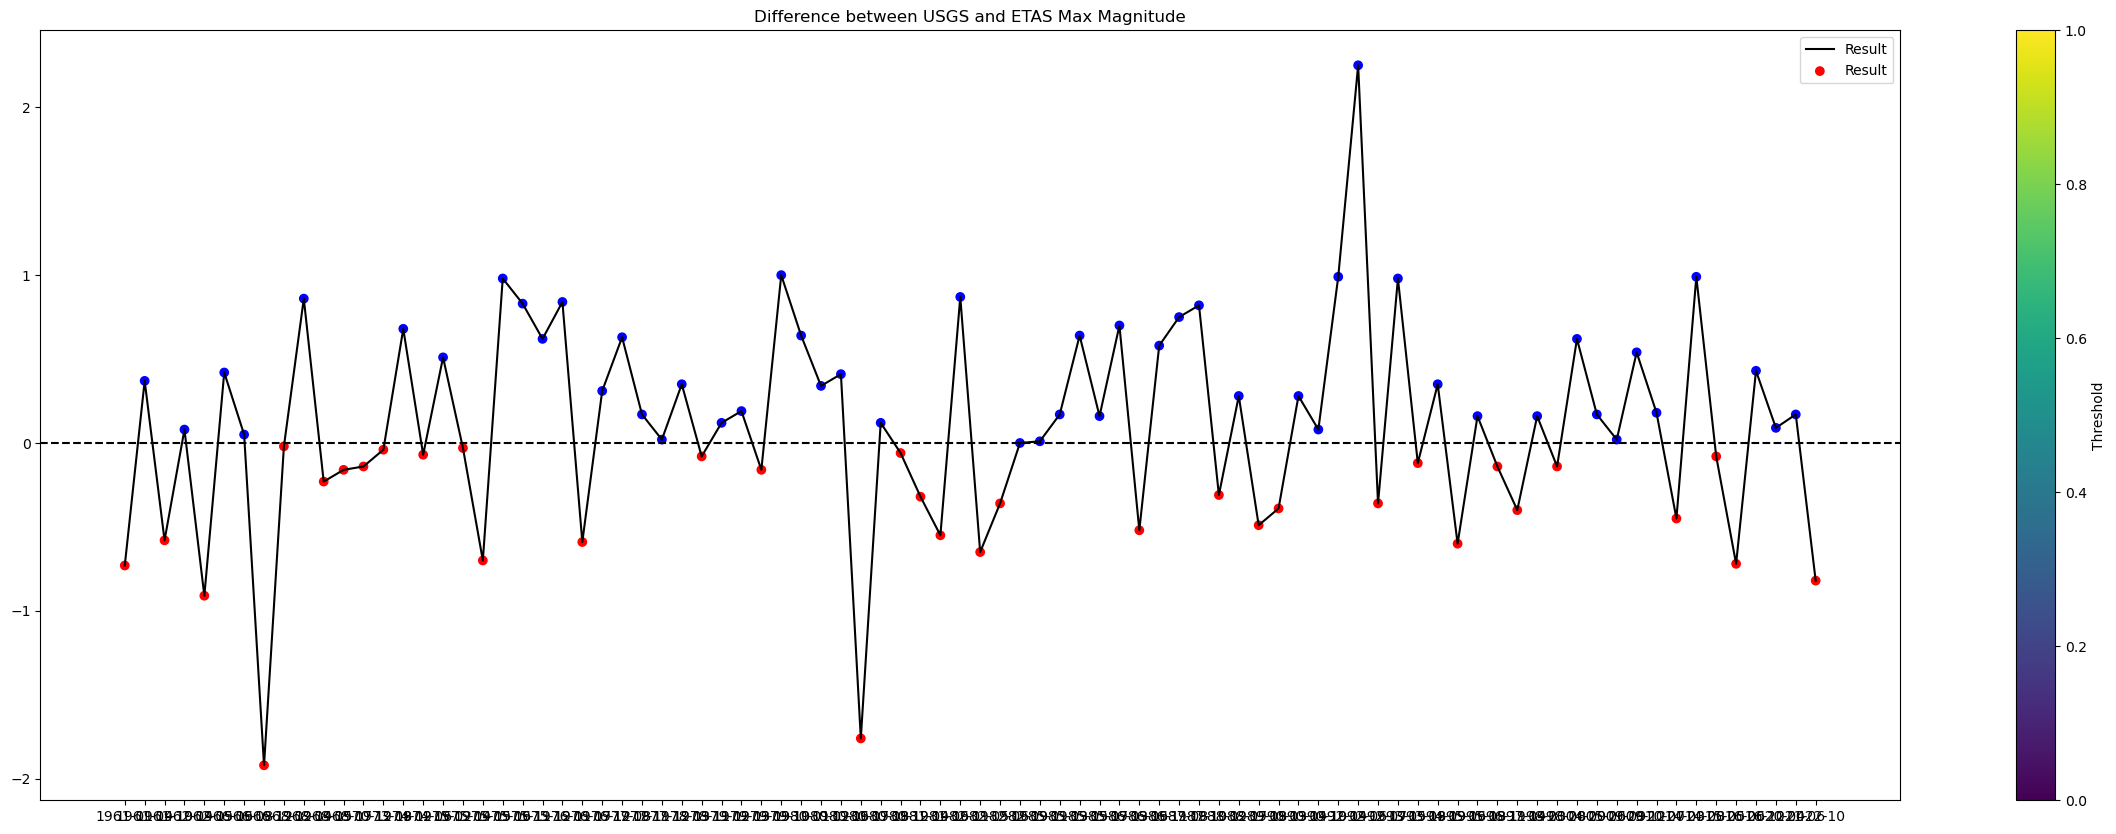

In [35]:
plt.figure(figsize=(30, 10))
plt.plot(x_values, y_values, label='Result', color='black')
plt.scatter(x_values, y_values, c=colors, marker='o', label='Result', cmap='viridis')
plt.colorbar(label='Threshold')
plt.legend()
plt.title('Difference between USGS and ETAS Max Magnitude')

plt.axhline(y=origin, color='black', linestyle='--', label='Origin')

In [36]:

fig = go.Figure()

scatter = go.Scatter(x=x_values, y=y_values, mode='markers', marker=dict(size=10, color=colors, colorscale='viridis'))

fig.add_trace(scatter)
fig.update_traces(line=dict(width=1.0))
fig.update_layout(
    title='Difference between USGS and ETAS Max Magnitude',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    width=1200,
    height=600,
)

fig.show()

In [37]:
greater = y_values > 0
print(len(greater))
lesser = y_values < 0
print(len(lesser))

86
86


In [38]:
# Create new data frames to store energy values
import math

usgs_max_energy_df = usgs_max.copy()
etas_max_energy_df = etas_max.copy()
usgs_mean_energy_df = mean_mag_usgs.copy()
etas_mean_energy_df = mean_mag_etas.copy()
usgs_sum_mag_energy_df = sum_mag_usgs.copy()
etas_sum_mag_energy_df = sum_mag_etas.copy()

formula_constant = (1/1.5)
usgs_max_energy_df['USGS'] = formula_constant * math.log(math.pow(10, 1.5*usgs_max_energy_df['USGS']))
etas_max_energy_df['ETAS'] = formula_constant * math.log(math.pow(10, 1.5*etas_max_energy_df['ETAS']))
usgs_mean_energy_df['USGS'] = formula_constant * math.log(math.pow(10, 1.5*usgs_mean_energy_df['USGS']))
etas_mean_energy_df['ETAS'] = formula_constant * math.log(math.pow(10, 1.5*etas_mean_energy_df['ETAS']))
usgs_sum_mag_energy_df['USGS'] = formula_constant * math.log(math.pow(10, 1.5*usgs_sum_mag_energy_df['USGS']))
etas_sum_mag_energy_df['ETAS'] = formula_constant * math.log(math.pow(10, 1.5*etas_sum_mag_energy_df['ETAS']))

TypeError: pow expected 2 arguments, got 1

In [ ]:
# Print energy dataframes

print(usgs_max_energy_df)
print(etas_max_energy_df)
print(usgs_mean_energy_df)
print(etas_mean_energy_df)
print(usgs_sum_mag_energy_df)
print(etas_sum_mag_energy_df)

        Date          USGS
0    1960-01  1.535057e+05
12   1961-01  1.722362e+05
13   1961-02  3.062841e+05
15   1961-04  1.164460e+06
21   1961-10  2.070735e+05
..       ...           ...
730  2020-11  3.062841e+05
731  2020-12  1.932522e+05
737  2021-06  2.729760e+05
738  2021-07  1.535057e+06
753  2022-10  1.762481e+05

[234 rows x 2 columns]
        Date          ETAS
2    1960-03  2.547560e+05
6    1960-07  1.762481e+05
10   1960-11  1.762481e+05
12   1961-01  9.249631e+05
15   1961-04  4.967346e+05
..       ...           ...
745  2022-03  1.607402e+05
746  2022-04  2.023599e+05
752  2022-10  1.164460e+06
753  2022-11  2.377521e+05
754  2022-12  1.888532e+05

[312 rows x 2 columns]
        Date         USGS
0    1960-01  7152.498295
1    1960-02  3466.366107
2    1960-03  3410.288310
3    1960-04  6415.574326
4    1960-05  4068.719618
..       ...          ...
751  2022-08  4594.923399
752  2022-09  4353.631857
753  2022-10  3458.614894
754  2022-11  2285.501825
755  2022-12  5509

In [ ]:
max_energy_df = usgs_max_energy_df.merge(etas_max_energy_df, on='Date')
max_energy_df['Date'] = max_energy_df['Date'].dt.to_timestamp()
max_energy_df.head()

,Date,USGS,ETAS
0,1961-01-01,1.722362e+05,9.249631e+05
1,1961-04-01,1.164460e+06,4.967346e+05
2,1961-10-01,2.070735e+05,7.872713e+05
3,1962-04-01,1.932522e+05,1.607402e+05
4,1962-05-01,1.932522e+05,1.570813e+06


In [ ]:
# Max energy dataframe plot

# Create a Plotly figure
fig = px.line(max_energy_df, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Energy'}, title='ETAS vs USGS Max Earthquake Energy')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [ ]:
mean_energy_df = usgs_mean_energy_df.merge(etas_mean_energy_df, on='Date')
mean_energy_df['Date'] = mean_energy_df['Date'].dt.to_timestamp()
mean_energy_df.head()

,Date,USGS,ETAS
0,1960-01-01,7152.498295,3247.200050
1,1960-02-01,3466.366107,4017.559038
2,1960-03-01,3410.288310,4820.005198
3,1960-04-01,6415.574326,3726.143401
4,1960-05-01,4068.719618,4216.786109


In [ ]:
# Mean energy dataframe plot

mean_energy_df = usgs_mean_energy_df.merge(etas_mean_energy_df, on='Date')
mean_energy_df['Date'] = mean_energy_df['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(mean_energy_df, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Energy'}, title='ETAS vs USGS Mean Earthquake Energy')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [ ]:
sum_mag_energy_df = usgs_sum_mag_energy_df.merge(etas_sum_mag_energy_df, on='Date')
sum_mag_energy_df['Date'] = sum_mag_energy_df['Date'].dt.to_timestamp()
sum_mag_energy_df.head()

,Date,USGS,ETAS
0,1960-01-01,1.607402e+44,1.276805e+173
1,1960-02-01,1.037826e+27,4.427152e+126
2,1960-03-01,1.845544e+20,1.062000e+182
3,1960-04-01,5.972064e+32,2.729760e+125
4,1960-05-01,5.322607e+20,3.516612e+120


In [ ]:
# Sum mag energy dataframe plot

# Create a Plotly figure
fig = px.line(sum_mag_energy_df, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Energy'}, title='ETAS vs USGS Sum Magnitude Energy')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()